In [85]:
from src.optimized_code import compute_risk,plurality_outcome_op,for_two_outcome_op, borda_outcome_op,veto_outcome_op, happiness_level, happiness_level_total, compute_risk_combinations, read_voting_
import os,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"
        
voting = read_voting_(path_voting, table_name="seven_candidates")[:,:15]
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E',5:'F',6:'G'}
voting1 = np.vectorize(mapping.get)(voting)
display(pd.DataFrame(voting1))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,C,A,B,E,B,F,F,D,G,C,G,D,C,C,B
1,G,E,F,B,D,C,B,B,E,G,A,B,G,F,C
2,A,C,A,C,E,D,E,A,B,B,E,A,B,E,E
3,B,G,C,F,A,B,A,C,F,A,C,F,E,G,A
4,D,B,E,A,G,E,D,G,D,E,F,C,A,A,D
5,E,D,D,G,C,G,C,E,A,F,D,E,F,D,G
6,F,F,G,D,F,A,G,F,C,D,B,G,D,B,F


In [87]:
outcomes_op = [plurality_outcome_op, veto_outcome_op, borda_outcome_op, for_two_outcome_op]
schemes = ["PLURALITY", "VETO", "BORDA", "FOR_TWO"]

for outcome, schema in zip(outcomes_op, schemes):
    print(f"{schema}: {outcome(voting1)}")

PLURALITY: C
VETO: E
BORDA: B
FOR_TWO: B


In [88]:
comb_p = compute_risk_combinations(voting,plurality_outcome_op)[1]
comb_ft = compute_risk_combinations(voting,for_two_outcome_op)[1]
comb_v = compute_risk_combinations(voting,veto_outcome_op)[1]
comb_b = compute_risk_combinations(voting,borda_outcome_op)[1]

rp = compute_risk_combinations(voting,plurality_outcome_op)[0]
rft = compute_risk_combinations(voting,for_two_outcome_op)[0]
rv= compute_risk_combinations(voting,veto_outcome_op)[0]
rb = compute_risk_combinations(voting,borda_outcome_op)[0]


In [89]:
comb_p

,voter,combination,new_result,strategic_happiness,old_happiness,overall_happiness,initial overall happiness
0,3,"(1, 4, 2, 5, 0, 6, 3)",1,0.70389,0.589513,8.994586,9.089513
1,3,"(1, 4, 2, 5, 0, 3, 6)",1,0.70389,0.589513,8.994586,9.089513
2,3,"(1, 4, 2, 5, 6, 0, 3)",1,0.70389,0.589513,8.994586,9.089513
3,3,"(1, 4, 2, 5, 6, 3, 0)",1,0.70389,0.589513,8.994586,9.089513
4,3,"(1, 4, 2, 5, 3, 0, 6)",1,0.70389,0.589513,8.994586,9.089513
...,...,...,...,...,...,...,...
1795,11,"(1, 6, 4, 5, 3, 2, 0)",1,0.70389,0.410487,8.994586,9.089513
1796,11,"(1, 6, 4, 5, 0, 3, 2)",1,0.70389,0.410487,8.994586,9.089513
1797,11,"(1, 6, 4, 5, 0, 2, 3)",1,0.70389,0.410487,8.994586,9.089513
1798,11,"(1, 6, 4, 5, 2, 3, 0)",1,0.70389,0.410487,8.994586,9.089513


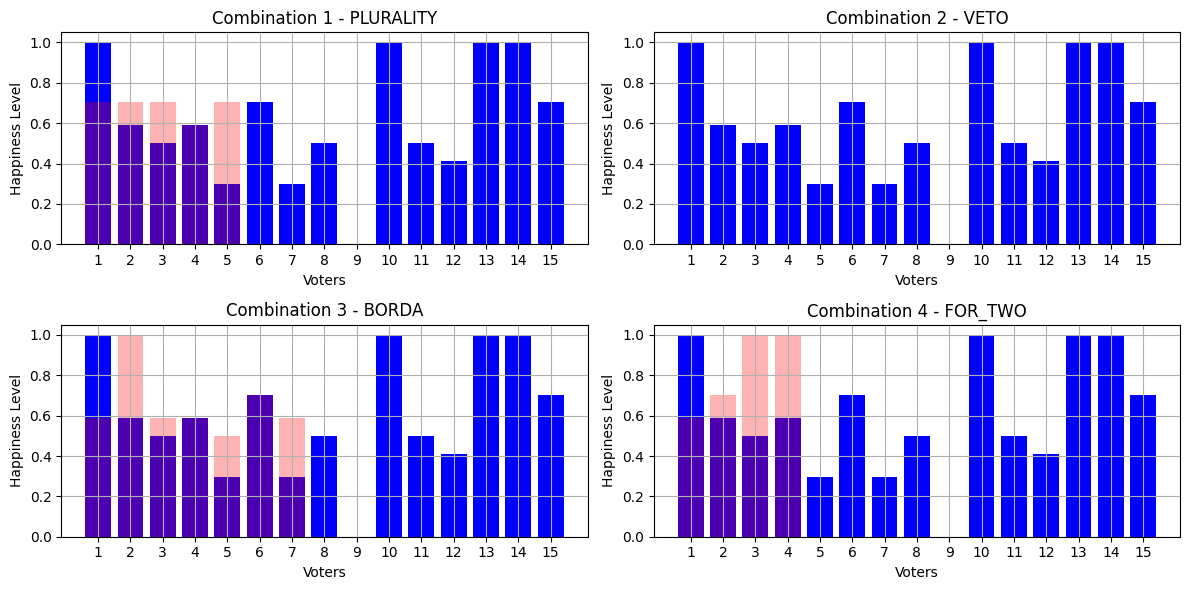

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have defined schemes, combination, and other necessary variables

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

schemes = ["PLURALITY", "VETO", "BORDA", "FOR_TWO"]

for i, (combination, scheme) in enumerate(zip([comb_p, comb_ft, comb_v, comb_b], schemes)):
    happiness_old = happiness_level_total(voting, plurality_outcome_op(voting))
    
    happiness_new = combination.groupby("voter")["strategic_happiness"].max().values
    
    indices = np.arange(len(happiness_new))  # Generate range of indices
    
    axs[i // 2, i % 2].bar(range(happiness_old.shape[0]), happiness_old, alpha=1, color="blue")
    axs[i // 2, i % 2].bar(indices, happiness_new, color="red", alpha=0.3)  # Use float value for alpha
    axs[i // 2, i % 2].set_xlabel('Voters')
    axs[i // 2, i % 2].set_ylabel('Happiness Level')
    axs[i // 2, i % 2].set_title(f'Combination {i+1} - {scheme}')
    axs[i // 2, i % 2].grid(True)
    # Set integer labels for x-axis
    axs[i // 2, i % 2].set_xticks(np.arange(voting.shape[1]))
    axs[i // 2, i % 2].set_xticklabels(np.arange(1, voting.shape[1] + 1))

plt.tight_layout()
plt.show()


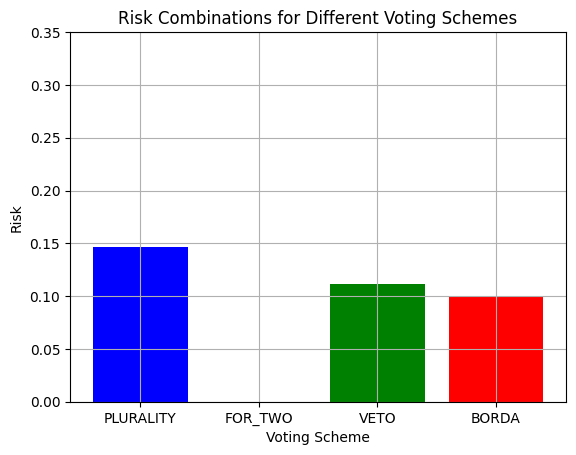

In [91]:
import matplotlib.pyplot as plt

# Data
voting_schemes = ["PLURALITY", "FOR_TWO", "VETO", "BORDA"]
risks = [rp, rft, rv, rb]
colors = ['blue', 'orange', 'green', 'red']  # Define colors for each bar

# Plotting
plt.bar(voting_schemes, risks, color=colors)
plt.xlabel('Voting Scheme')
plt.grid(True)
plt.ylabel('Risk')
plt.ylim(0,0.35)
plt.title('Risk Combinations for Different Voting Schemes')
plt.show()
